In [1]:
#Import libaries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('CardioGoodFitness.csv')
df.head(10)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47
5,TM195,20,Female,14,Partnered,3,3,32973,66
6,TM195,21,Female,14,Partnered,3,3,35247,75
7,TM195,21,Male,13,Single,3,3,32973,85
8,TM195,21,Male,15,Single,5,4,35247,141
9,TM195,21,Female,15,Partnered,2,3,37521,85


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [4]:
#checking for null values
df.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

In [5]:
#changing non-numerical columns to category type
df["Product"] = df["Product"].astype("category")
df["Gender"] = df["Gender"].astype("category")
df["MaritalStatus"] = df["MaritalStatus"].astype("category")

In [6]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


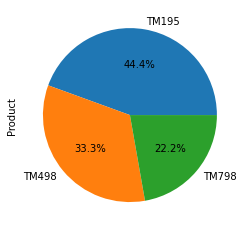

In [7]:
df['Product'].value_counts().plot.pie(autopct='%1.1f%%')
plt.show()

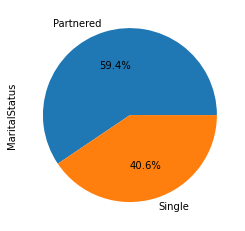

In [8]:
df['MaritalStatus'].value_counts().plot.pie(autopct='%1.1f%%')
plt.show()

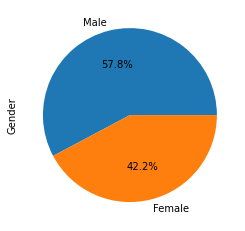

In [9]:
df['Gender'].value_counts().plot.pie(autopct='%1.1f%%')
plt.show()

In [10]:
def plot_uni(d):
    f,ax = plt.subplots(nrows=1,ncols=2,figsize=(10,5))
    sns.histplot(d, kde=True, ax=ax[0])
    ax[0].axvline(d.mean(), color='y', linestyle='--',linewidth=2)
    ax[0].axvline(d.median(), color='r', linestyle='dashed', linewidth=2)
    ax[0].axvline(d.mode()[0],color='g',linestyle='solid',linewidth=2)
    ax[0].legend({'Mean':d.mean(),'Median':d.median(),'Mode':d.mode()})
    
    sns.boxplot(x=d, showmeans=True, ax=ax[1])
    plt.tight_layout()

In [11]:
num_cols = df.select_dtypes('int64').columns.values
num_cols

array(['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles'],
      dtype=object)

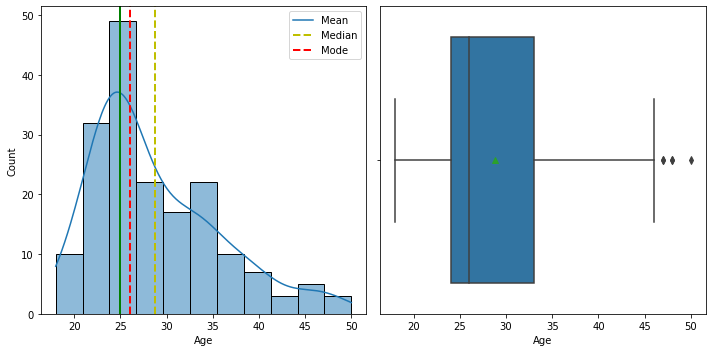

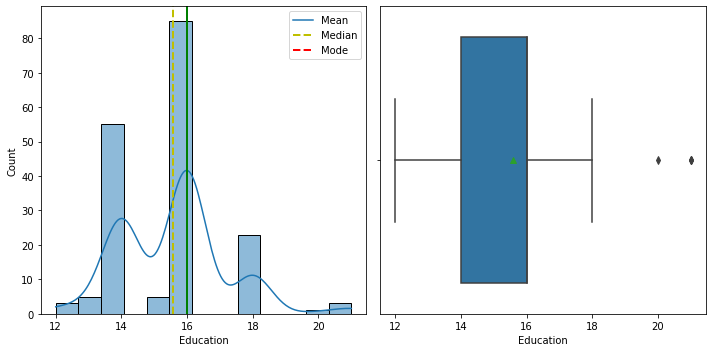

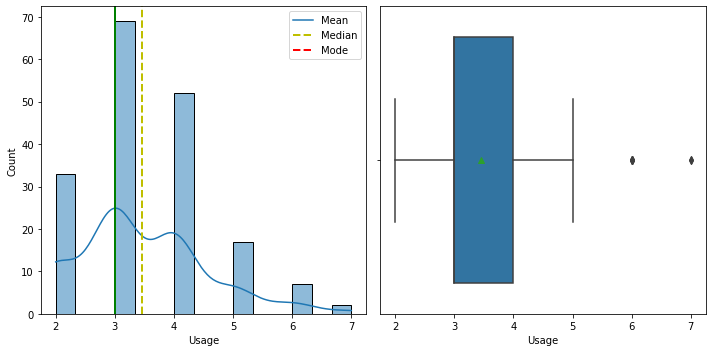

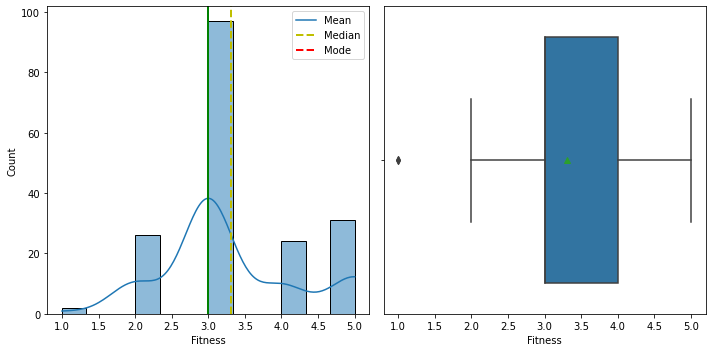

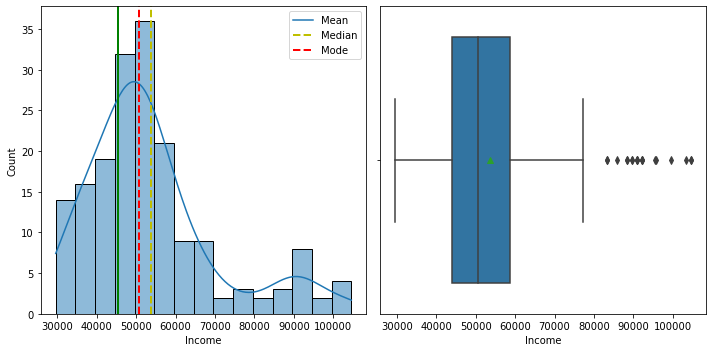

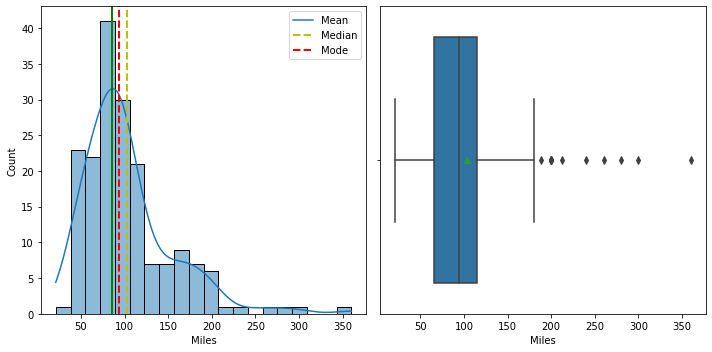

In [12]:
for i in num_cols:
    plot_uni(df[i])

In [13]:
##Average income of those buying each model
df.groupby('Product')['Income'].mean() 

Product
TM195    46418.025
TM498    48973.650
TM798    75441.575
Name: Income, dtype: float64

Product  Gender
TM195    Female    40
         Male      40
TM498    Female    29
         Male      31
TM798    Female     7
         Male      33
dtype: int64


<AxesSubplot:xlabel='Product', ylabel='Count'>

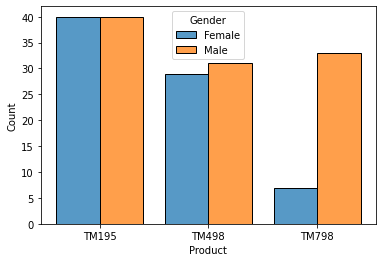

In [14]:
## models bought by different Genders
print(df[['Product','Gender']].value_counts().sort_index()) 
sns.histplot(x='Product', data=df, hue='Gender', multiple="dodge", shrink=.8)

Product  MaritalStatus
TM195    Partnered        48
         Single           32
TM498    Partnered        36
         Single           24
TM798    Partnered        23
         Single           17
dtype: int64


<AxesSubplot:xlabel='Product', ylabel='Count'>

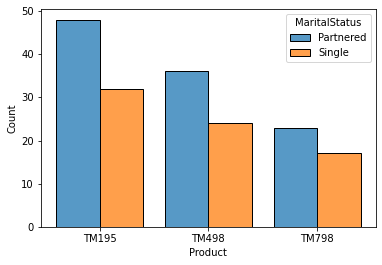

In [15]:
## models bought by their Marital Status
print(df[['Product','MaritalStatus']].value_counts().sort_index()) 
sns.histplot(x='Product',data=df, hue='MaritalStatus', multiple="dodge", shrink=.8)

<AxesSubplot:>

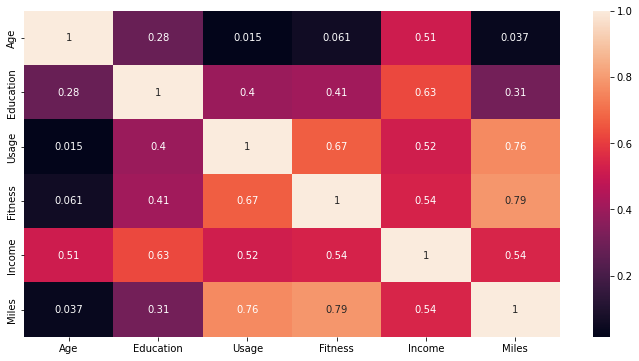

In [16]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), annot=True)

(array([0, 1, 2]),
 [Text(0, 0, 'TM195'), Text(1, 0, 'TM498'), Text(2, 0, 'TM798')])

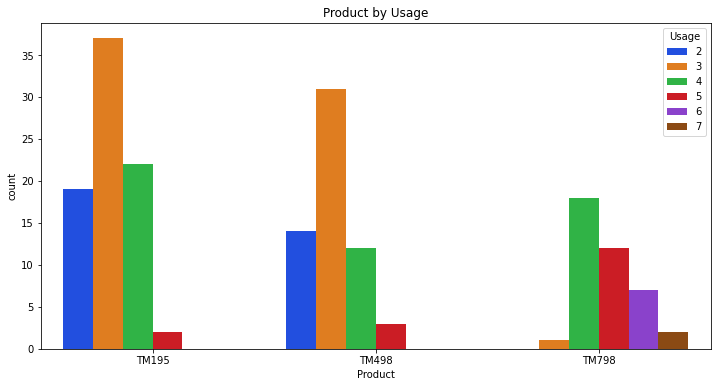

In [17]:
#Usage of each model product
plt.figure(figsize=(12,6))
sns.countplot(x='Product', data=df, hue='Usage', palette='bright').set(title = 'Product by Usage')
plt.xticks(rotation=360)

[Text(0.5, 1.0, 'Product by Education')]

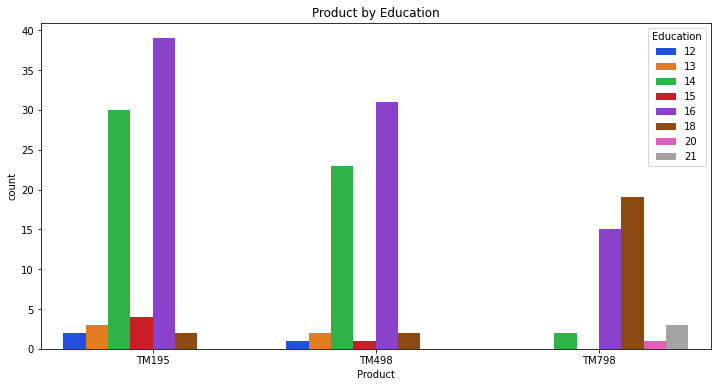

In [18]:
#Education qualification of those that purchase each model
plt.figure(figsize=(12,6))
sns.countplot(x='Product', data=df, hue='Education', palette='bright').set(title = 'Product by Education')

[Text(0.5, 1.0, 'Product by Fitness')]

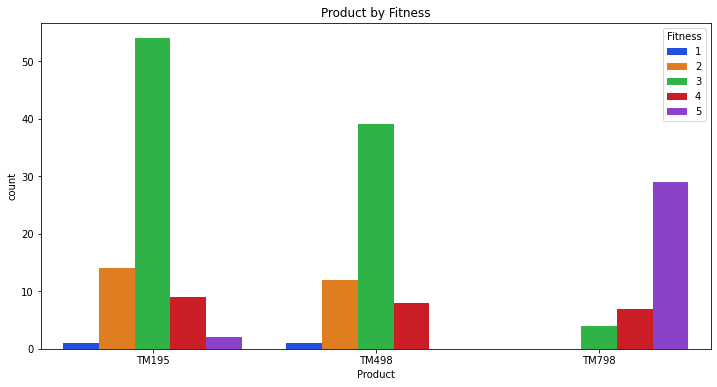

In [19]:
plt.figure(figsize=(12,6))
sns.countplot(x='Product', data=df, hue='Fitness', palette='bright').set(title = 'Product by Fitness')

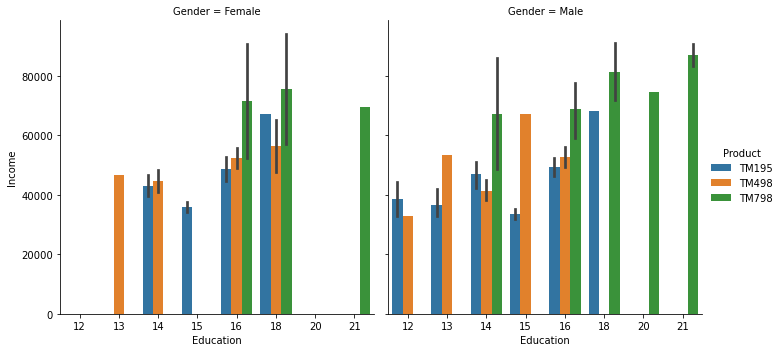

In [20]:
sns.catplot(x='Education', y='Income', col='Gender',hue='Product' ,kind="bar", data=df)

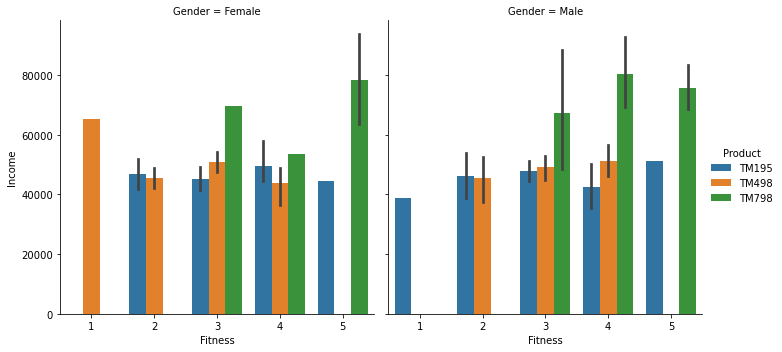

In [21]:
sns.catplot(x='Fitness', y='Income', col='Gender',hue='Product' ,kind="bar", data=df)

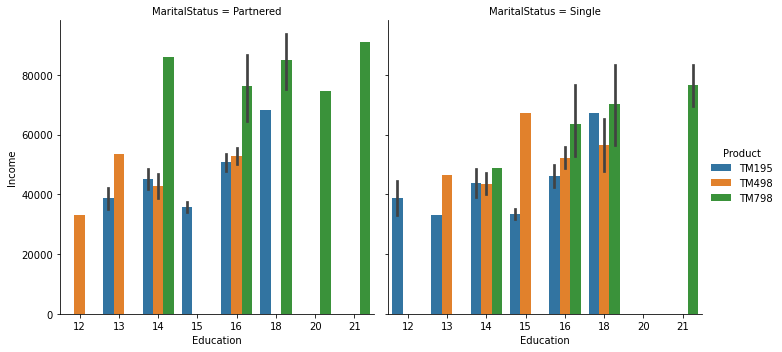

In [22]:
sns.catplot(x='Education', y='Income', col='MaritalStatus',hue='Product' ,kind="bar", data=df)

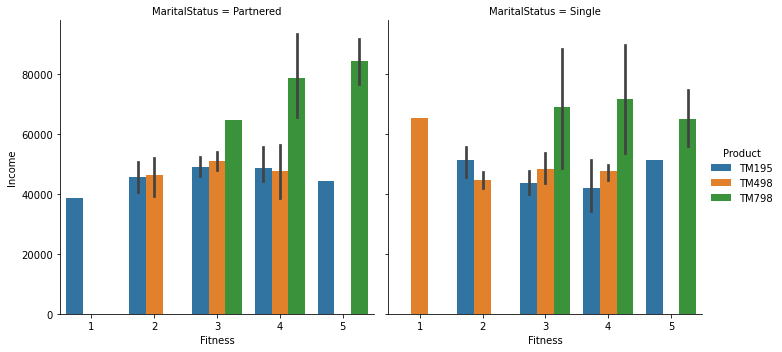

In [23]:
sns.catplot(x='Fitness', y='Income', col='MaritalStatus',hue='Product' ,kind="bar", data=df)

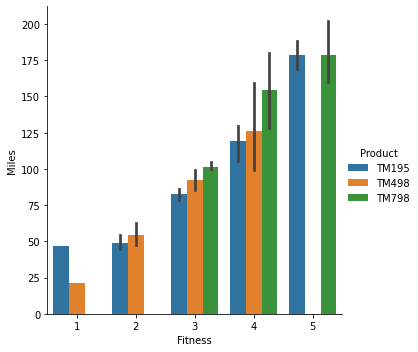

In [24]:
sns.catplot(x='Fitness', y='Miles', hue='Product' ,kind="bar", data=df)

MaritalStatus Partnered      Single     
Gender           Female Male Female Male
Product                                 
TM195                27   21     13   19
TM498                15   21     14   10
TM798                 4   19      3   14


<AxesSubplot:xlabel='Product'>

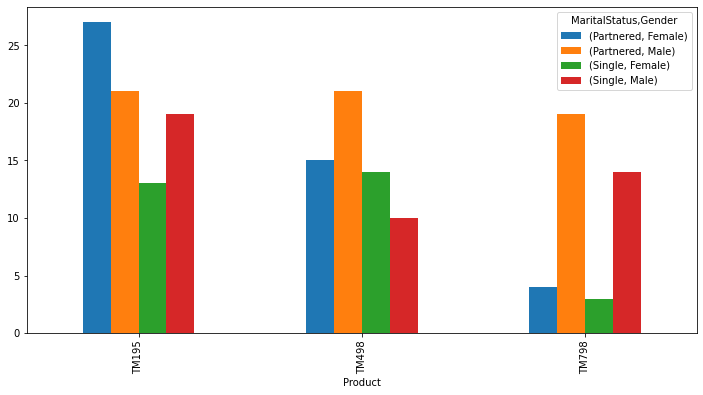

In [25]:
product_status= pd.crosstab(index=df['Product'], columns=[df['MaritalStatus'],df['Gender']] )
print(product_status)
product_status.plot(kind='bar',figsize=(12,6))